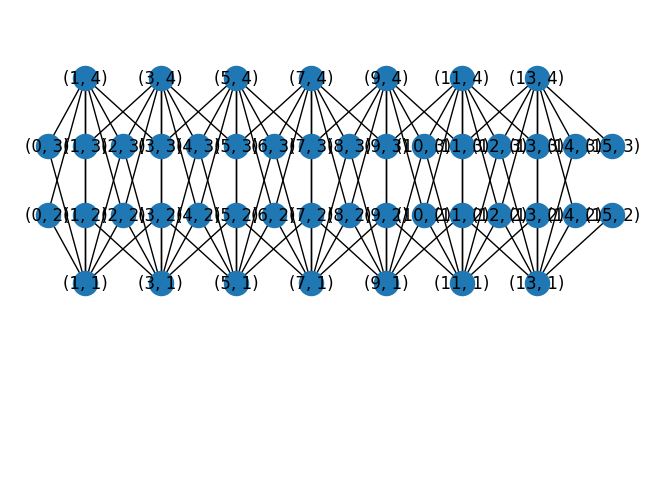

In [2]:
#WORKING

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
import csv
G = nx.Graph()

def coord_to_index(coord):
    return coord[0] + coord[1]*size[0]

points1 = [] #placement of lidars for one side
points2 = [] #placement of lidars for other side
points3 = [] #vertices to cover


for i in range(1, 15, 2):
    point = (i, 1)
    points1.append(point)

for i in range(1, 15, 2):
    point = (i, 4)
    points2.append(point)

for i in range(0, 16):
    for j in range(2, 4):
        point = (i, j)
        points3.append(point)

G.add_nodes_from(points1 + points2 + points3)


#edge that represents scope between lidar placement and vertices to cover
for node1 in points1:
  for j in range (node1[1]+1, node1[1]+3):
    if(j==node1[1]+1):
      for i in range(node1[0]-2, node1[0]+3):
        if (i,j) in points3:
          G.add_edge(tuple(node1), (i,j))
    if(j== node1[1]+2):
      for i in range(node1[0]-1, node1[0]+2):
        if (i,j) in points3:
          G.add_edge(tuple(node1), (i,j))
for node2 in points2:
  for j in range (node2[1]-2,node2[1]):
    if(j== node2[1]-2):
      for i in range(node2[0]-1, node2[0]+2):
        if (i,j) in points3:
          G.add_edge(tuple(node2), (i,j))
    if(j==node2[1]-1):
      for i in range(node2[0]-2, node2[0]+3):
        if (i,j) in points3:
          G.add_edge(tuple(node2), (i,j))
    

#Draw the graph

pos = {node: node for node in G.nodes()} 
nx.draw(G, pos,with_labels=True)

plt.xlim(-1, 16)
plt.ylim(-2, 5)

plt.xticks(range(0, 16))
plt.yticks(range(1, 5))

plt.show()
pointsL = points1 + points2


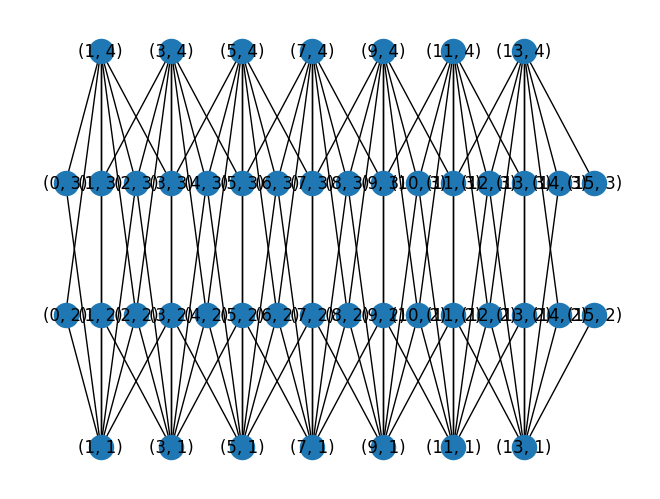

In [3]:
n = len(pointsL)
def energyF(pointsL, points3):
    def f(x):
        somme = 0    
        L = 10
        somme = int(sum([x[i] for (i,v) in enumerate(pointsL)]))
        for node in points3:
            prod = int(math.prod([1 - x[i] for (i,v) in enumerate(pointsL) if (v in G.neighbors(node))])) * L
            # print(node)
            # print(prod)
            somme += prod
            for (i,v) in enumerate(pointsL):
                if (v in G.neighbors(node)):
                    pass
                    # print(v)
                    # print("x", i, " = ", x[i])
            
        return somme 
    return(f)

#def f() lambda x: energyF(x, y, z)

pos = {node: node for node in G.nodes()}
nx.draw(G, pos, with_labels=True)

In [4]:
from typing import List, Union, Callable  # for type hints

import numpy as np
import random
from time import time
import math


def sa_solve(
    f: Callable,
    n: int,
    n_iter: int = 1,
    n_temp_iter: int = 10000,
    temp: float = 50,
    warm_start: Union[List, np.ndarray] = None,
) -> (List, List, float):
    """
    Standard simulated annealing solver

    :param f: cost function
    :param n: problem instance size (i.e., length of solution bitstring)
    :param n_iter: number of runs
    :param n_temp_iter: number of mutations
    :param temp: starting temperature
    :param warm_start: warm start solution vector
    :return: solution with samples, energies and times
    """
    samples = []
    energies = []
    indices = list(range(0, n))

    # keep track of wallclock time
    start_time = time()

    for _ in range(n_iter):
        # define start vector
        if warm_start is None:
            x = np.array([0] * n) #start with the full graph
        else:
            x = np.array(warm_start)

        # evaluate start vectorx
        curr, curr_eval = x, f(x)
        best, best_eval = curr, curr_eval

        for i in range(n_temp_iter):
            # flip a random bit to generate a neighbor
            candidate = np.copy(curr)
            flip_pos = random.sample(indices, 1)
            candidate[flip_pos] = int(not candidate[flip_pos])

            # evaluate new vector
            candidate_eval = f(candidate)

            # keep best vector
            if candidate_eval <= best_eval:
                best, best_eval = candidate, candidate_eval

            # update temperature according to Metropolis–Hastings algorithm
            diff = candidate_eval - curr_eval
            t = temp / float(i + 1)

            metropolis_eval = math.exp(-diff / t)

            # base new mutations on new vector
            if diff <= 0 or random.random() < metropolis_eval:
                curr, curr_eval = candidate, candidate_eval

        samples.append(best.tolist())
        energies.append(best_eval)

    runtime = time() - start_time
    
    return samples, energies, runtime

[[1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1]]
[([1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1], 5)]
[(1, 1), (9, 1), (13, 1), (5, 4), (13, 4)]
[['PUBO', '10000', '50', '(9, 1)', '(13, 1)', '(1, 4)', '(3, 4)', '(5, 4)', '(13, 4)'], [], ['PUBO', '10000', '50', '(5, 1)', '(7, 1)', '(13, 1)', '(1, 4)', '(11, 4)', '(13, 4)'], [], ['PUBO', '10000', '50', '(5, 1)', '(13, 1)', '(1, 4)', '(9, 4)', '(13, 4)'], [], ['PUBO', '10000', '50', '(5, 1)', '(7, 1)', '(13, 1)', '(1, 4)', '(11, 4)', '(13, 4)'], [], ['PUBO', '10000', '50', '(1, 1)', '(9, 1)', '(13, 1)', '(5, 4)', '(13, 4)'], [], ['PUBO', '10000', '50', '(1, 1)', '(7, 1)', '(13, 1)', '(3, 4)', '(9, 4)', '(13, 4)'], [], ['PUBO', '10000', '50', '(1, 1)', '(9, 1)', '(13, 1)', '(5, 4)', '(13, 4)'], [], ['PUBO', '10000', '50', '(1, 1)', '(9, 1)', '(13, 1)', '(5, 4)', '(13, 4)'], []]


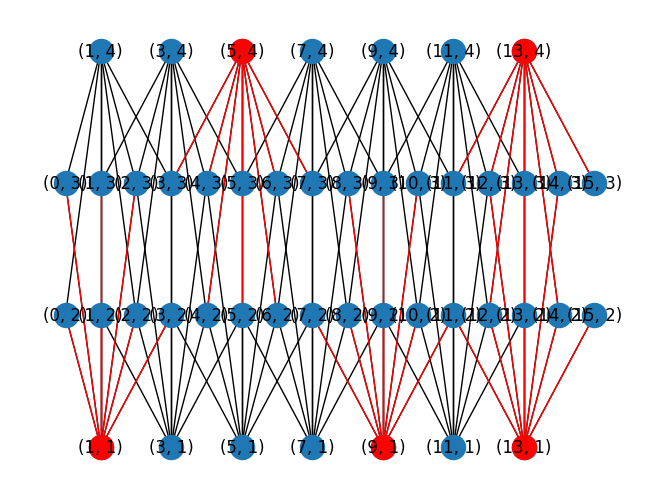

In [7]:
#print(pointsL)
n_temp_iter = 10000
temp = 50
for i in range (1):

    samples, energies, runtime = sa_solve(energyF(pointsL, points3), len(pointsL))
    S = []
    print(samples)
    for i in range(len(samples[0])):
        if samples[0][i]:
            S.append(pointsL[i])
    with open('resultSA.csv', 'a') as filecsv:
        writer = csv.writer(filecsv)
        writer.writerow(["PUBO", n_temp_iter, temp] + S)
    #filecsv.write(S)
#print(runtime)
print(list(zip(samples, energies)))
# S = []
# for i in range(len(samples[0])):
#     if samples[0][i]:
#         S.append(pointsL[i])
print(S) 
with open('resultSA.csv', 'r') as csv_file:
       csv_reader = csv.reader(csv_file)
       rows = list(csv_reader)
print(rows)
actE = []
for node in S:
  for edge in G.edges(node):
    actE.append(edge)
pos = {node: node for node in G.nodes()}
nx.draw(G, pos, with_labels=True)
nx.draw_networkx_nodes(G, pos, S, node_color='red')
nx.draw_networkx_edges(G, pos, actE, edge_color='red')